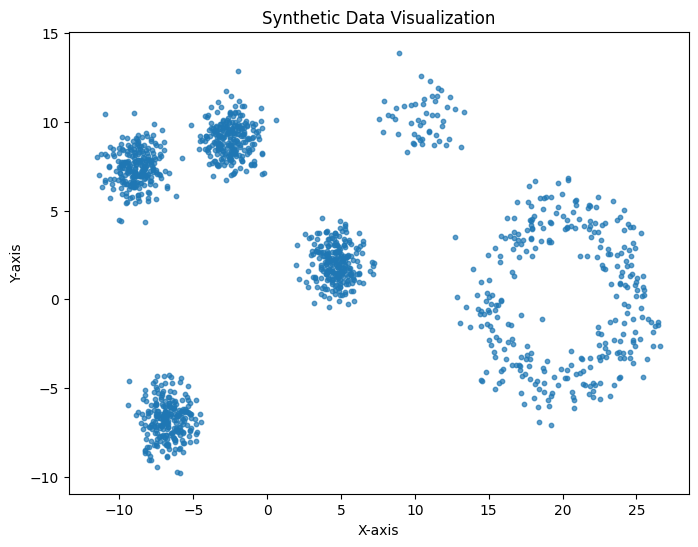

               Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
KMeans                 0.725118              0.388403              5499.239421
Agglomerative          0.725690              0.385531              5488.001181
DBSCAN                 0.722259              1.674458              4325.387817


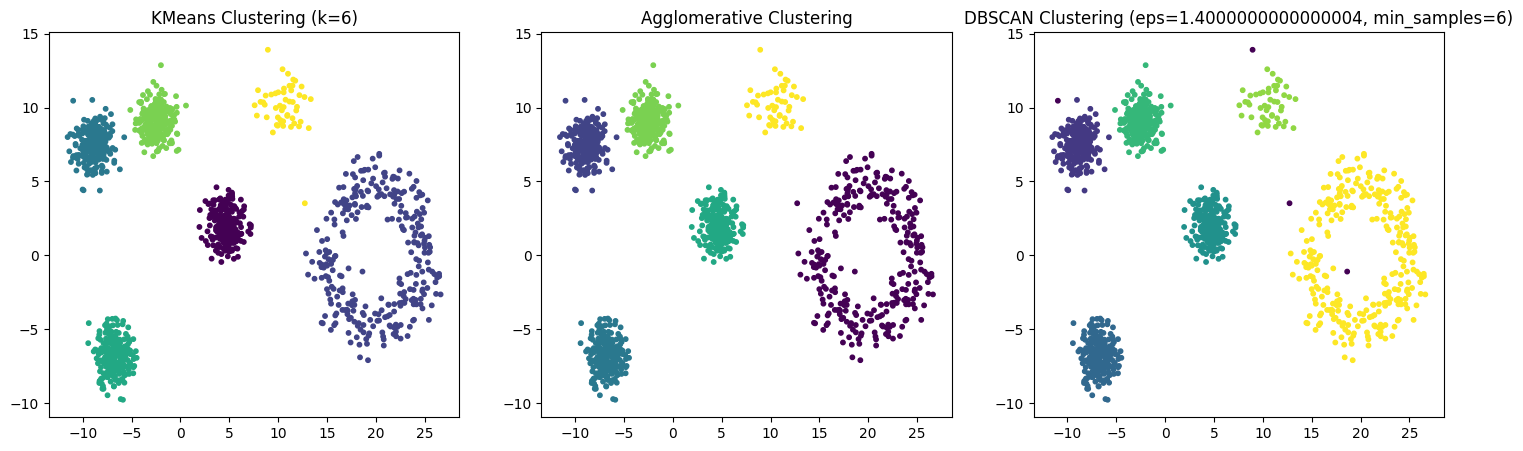

File saved at: /mnt/data/hyperparams.csv
File saved at: /mnt/data/hyperparams.pdf


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

%matplotlib inline

def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
    X_1, y_1 = make_blobs(n_samples=n1_samples, centers=4, random_state=42)
    X_2, y_2 = make_moons(n_samples=n2_samples, noise=the_noise, random_state=42)
    X_2[:, 0] += 10
    X_2[:, 1] += 10
    rng = np.random.RandomState(42)
    angles = rng.rand(n3_samples) * 2 * np.pi
    r = 5.0 + rng.randn(n3_samples) * the_noise
    X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
    X_3[:, 0] += 20
    X = np.vstack((X_1, X_2, X_3))
    return X

X = create_data(1.0, 1000, 50, 300, 200)

output_dir = "/mnt/data"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Synthetic Data Visualization")
plt.show()

best_k = 2
best_score = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_k = k
        best_score = score

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

agglo = AgglomerativeClustering(n_clusters=best_k)
agglo_labels = agglo.fit_predict(X)

best_eps = 0.5
best_min_samples = 5
best_dbscan_score = -1

for eps in np.arange(0.2, 1.5, 0.1):
    for min_samples in range(3, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_dbscan_score:
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan_score = score

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X)

metrics = ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"]
values = [
    [silhouette_score(X, kmeans_labels), davies_bouldin_score(X, kmeans_labels), calinski_harabasz_score(X, kmeans_labels)],
    [silhouette_score(X, agglo_labels), davies_bouldin_score(X, agglo_labels), calinski_harabasz_score(X, agglo_labels)],
    [silhouette_score(X, dbscan_labels), davies_bouldin_score(X, dbscan_labels), calinski_harabasz_score(X, dbscan_labels)]
]

comparison_df = pd.DataFrame(values, index=["KMeans", "Agglomerative", "DBSCAN"], columns=metrics)
print(comparison_df)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
axes[0].set_title(f'KMeans Clustering (k={best_k})')

axes[1].scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap='viridis', s=10)
axes[1].set_title('Agglomerative Clustering')

axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
axes[2].set_title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')

plt.show()
experiment_data = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    experiment_data.append(["KMeans", k, None, None, score])

for eps in np.arange(0.2, 1.5, 0.1):
    for min_samples in range(3, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            experiment_data.append(["DBSCAN", None, eps, min_samples, score])

experiment_df = pd.DataFrame(experiment_data, columns=["Algorithm", "K", "Epsilon", "Min Samples", "Silhouette Score"])

csv_path = os.path.join(output_dir, "hyperparams.csv")
experiment_df.to_csv(csv_path, index=False)

pdf_path = os.path.join(output_dir, "hyperparams.pdf")
experiment_df.to_csv(pdf_path, index=False)

print(f"File saved at: {csv_path}")
print(f"File saved at: {pdf_path}")
